In [1]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [2]:
my_object = {
    "amount_usd": 100,
    "total_usd": 108,
    "total_inr": 8500
}

print(my_object)

{'amount_usd': 100, 'total_usd': 108, 'total_inr': 8500}


In [3]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [8]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calculate_total", calc_total)
builder.add_node("convert_inr", convert_to_inr)

builder.add_edge(START, "calculate_total")
builder.add_edge("calculate_total", "convert_inr")
builder.add_edge("convert_inr", END)

graph = builder.compile()

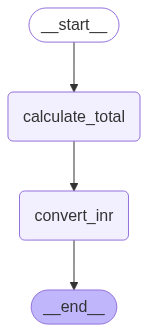

In [9]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"amount_usd": 5000.00})

{'amount_usd': 5000.0, 'total_usd': 5400.0, 'total_inr': 459000.0}